In [55]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error
import warnings
import phik
import seaborn as sns


In [56]:
train_data = pd.read_csv('SP.csv')

In [57]:
train_data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [58]:
phik_corr = train_data.phik_matrix()
print(phik_corr)

interval columns not set, guessing: ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']
                   StudentID       Age    Gender  Ethnicity  \
StudentID           1.000000  0.021337  0.000000   0.045266   
Age                 0.021337  1.000000  0.068811   0.000000   
Gender              0.000000  0.068811  1.000000   0.000000   
Ethnicity           0.045266  0.000000  0.000000   1.000000   
ParentalEducation   0.056640  0.000000  0.000000   0.017242   
StudyTimeWeekly     0.000000  0.023047  0.000000   0.084376   
Absences            0.000000  0.057652  0.000000   0.016332   
Tutoring            0.000000  0.000000  0.035942   0.000000   
ParentalSupport     0.000000  0.041314  0.000000   0.000000   
Extracurricular     0.074291  0.000000  0.000000   0.052579   
Sports              0.060419  0.072203  0.000000   0.000000   
Music 

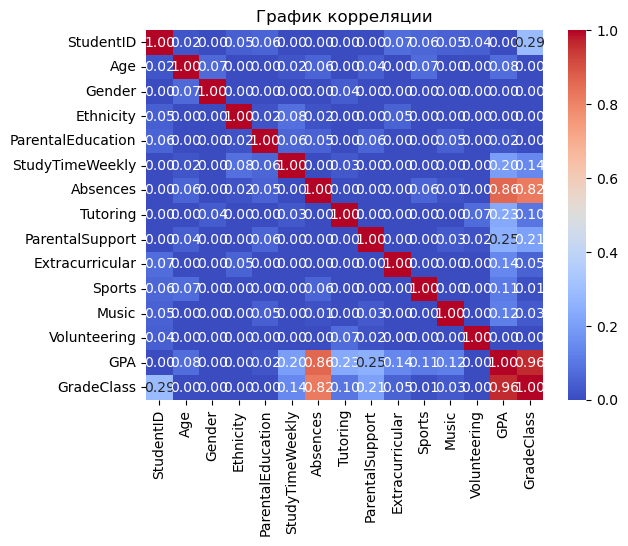

In [59]:
sns.heatmap(phik_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('График корреляции')
plt.show()

In [61]:
y = train_data['GradeClass']
X = train_data.drop(['StudentID','GradeClass','Ethnicity','Extracurricular','Sports','Music','Volunteering'], axis=1)

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

In [63]:
model=CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

In [64]:
name='CatBoost'
results = []
train_score = model.score(X_train, y_train)
test_score = model.score(X_val, y_val)

y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)

mae = mean_absolute_error(y_val, y_val_pred)
results.append({
    'Model': name,
    'Train Score': train_score,
    'Test Score': test_score,
    'Accuracy Score': accuracy,
    'MAE': mae
    })
results[0]

{'Model': 'CatBoost',
 'Train Score': 0.9874542603240982,
 'Test Score': 0.9436325678496869,
 'Accuracy Score': 0.9436325678496869,
 'MAE': 0.10647181628392484}

In [66]:
X_val

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA
1035,16,0,2,15.215186,6,1,4,3.539199
1820,17,0,2,3.307409,26,1,2,0.840691
33,16,0,3,15.893258,21,0,0,0.949406
1180,16,1,2,5.638591,19,0,1,0.897217
1113,17,1,1,10.207854,2,0,3,3.680961
...,...,...,...,...,...,...,...,...
1624,16,1,2,15.272306,28,1,3,0.347837
504,17,1,0,18.751007,0,1,4,3.947093
380,18,1,1,3.772645,7,0,2,2.525116
2037,17,0,2,8.047411,8,0,4,3.129117


In [69]:
res=model.predict(X_val)

res

CatBoostError: Invalid data type=<class 'str'> : must be list, numpy.ndarray, pandas.Series, pandas.DataFrame, scipy.sparse matrix, catboost.FeaturesData or catboost.Pool

In [49]:
with open("modelnogpa.pkl", "wb") as file:
    pickle.dump(model, file)

In [50]:
rez1 = np.c_[X_train, y_train]

In [51]:
df=pd.read_csv("SP.csv")


In [52]:
column_names= X.columns.tolist()
column_names

['Age',
 'Gender',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'GPA']

In [53]:
df=pd.DataFrame(columns=[
 'Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GPA',])

In [54]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
